In [131]:
import pandas as pd
import numpy as np
import jieba
import nltk
import math
import string
from nltk.corpus import stopwords
from collections import Counter
from nltk.stem.porter import *
from sklearn.feature_extraction.text import TfidfVectorizer
from google.colab import files
import matplotlib.pyplot as plt

In [ ]:
data_seven = pd.read_csv("/content/7-11_cate.csv")
data_rt_mart = pd.read_csv("/content/RT_mart_cate.csv")
data_love_buy = pd.read_csv("/content/love_buy_cate.csv")

FileNotFoundError: ignored

In [ ]:
data_love_buy = data_love_buy.rename(columns = {"4":"cate", "5":"name"})
data_rt_mart = data_rt_mart.rename(columns = {"2":"cate", "3":"name"})
data_seven = data_seven.rename(columns = {"category":"cate", "category_product":"name"})

In [ ]:
data = pd.DataFrame()
data = data.append(data_love_buy)
data = data.append(data_rt_mart)
data = data.append(data_seven)

In [ ]:
data.head()

In [ ]:
data = data.reset_index(drop = True)

In [ ]:
cate_list = list(set(data["cate"]))

In [ ]:
len(cate_list)

In [ ]:
all_data = []
count_freq = []
for i in range(len(cate_list)):
  string = ""
  count = 0
  for j in range(len(data)):
    if data.loc[j, "cate"] == cate_list[i]:
      count = count + 1
      string = string +"/"+ str(data.loc[j, "name"])
  all_data.append(string)
  count_freq.append(count)

In [ ]:
count_list = 0
need_category = []
for i in range(len(count_freq)):
  if count_freq[i] >= 80:
    need_category.append(cate_list[i])

In [ ]:
len(need_category)

In [ ]:
def convert_list_to_string(org_list, seperator=' '):
    """ Convert list to string, by joining all item in list with given separator.
        Returns the concatenated string """
    return seperator.join(org_list)

In [ ]:
len(set(need_category))

In [ ]:
need_list = convert_list_to_string(need_category)

In [ ]:
data.loc[1,:]

In [ ]:
need_data = []
for i in range(len(data)):
  try:
    if re.findall(str(data.loc[i ,"cate"]), need_list):
      need_data.append(data.loc[i,:])
  except:
    need_data.append(data.loc[i,:])

In [ ]:
need_data = pd.DataFrame(need_data).reset_index(drop = True)

In [ ]:
test_list = cate_list[0:len(all_data)]

In [ ]:
ana_data = pd.DataFrame()
ana_data["cate"] = test_list
ana_data["content"] = all_data

In [ ]:
ana_data = ana_data.drop(0, errors = "ignore")
ana_data = ana_data.reset_index(drop = True)

In [ ]:
ana_data

In [ ]:
partial_all_data = []

for i in range(len(need_list)):
  string = ""
  count = 0
  for j in range(len(need_data)):
    if need_data.loc[j, "cate"] == need_list[i]:
      count = count + 1
      string = string +"/"+ str(need_data.loc[j, "name"])
  partial_all_data.append(string)

# Jieba 斷詞

In [ ]:
import jieba
import jieba.posseg
jieba.set_dictionary('dict.txt.big.txt')

In [ ]:
def add_word(word, freq):
  jieba.add_word(word, freq=freq, tag="n")

In [ ]:
name = ["天地合補","家樂氏","萬歲牌","伯朗","馬玉山","白蘭氏","麥斯威爾","天仁","桂格"
"拿鐵","抹茶","杜老爺","依必朗","薇薇特南果","喜瑞爾"]
for i in range(len(name)):
  add_word(name[i],80)

Building prefix dict from /content/dict.txt.big.txt ...
Dumping model to file cache /tmp/jieba.u43f464b336de155982df71dc6a2e3f9e.cache
Loading model cost 1.611 seconds.
Prefix dict has been built successfully.


In [ ]:
daily_item = pd.read_excel("/content/宿舍物品勾選清單.xlsx", header=None)
daily_item

,0
0,內衣
1,內褲
2,襪子
3,短袖上衣
4,短褲/裙子
...,...
124,雨傘
125,雨衣
126,安全帽
127,鏡子


In [ ]:
for i in range(len(daily_item)):
  add_word(daily_item.loc[i,0],50)

In [ ]:
train_name = pd.read_csv("/content/name_data (1).csv", encoding="utf-8-sig")
train_name = train_name.drop(columns = "Unnamed: 0", errors="ignore")
#train_name = train_name.drop_duplicates(subset ="company name", keep = False, inplace = True) 

In [ ]:
for i in range(len(train_name)):
  add_word(str(train_name.loc[i,"company name"]),80)

In [ ]:
country_name = pd.read_excel("/content/country_name.xlsx",header=None)

In [ ]:
for i in range(len(country_name)):
  add_word(str(country_name.loc[i,0]),100)

In [ ]:
color_name = pd.read_csv("/content/顏色表.csv",header=None)

In [ ]:
for i in range(len(color_name)):
  add_word(str(color_name.loc[i,0]),100)

In [ ]:
need_data.head()

NameError: ignored

In [ ]:
def replace_some_word(text ,word):
  #print(word)
  text = text.replace(word, "")
  return text

In [ ]:
delete_word = ["補充包","包","盒","入","雙","組","袋","件","吋","裝","尺","人",
        "瓶","二","三","箱","桶","塊","份","盒","愛買"]

In [ ]:
for i in range(len(need_data)):
  temp = str(need_data.loc[i,"name"])
  for j in range(len(delete_word)):
    temp = replace_some_word(temp ,delete_word[j])
    #print(temp)
  need_data.loc[i,"deal"] = temp

In [ ]:
need_data

In [ ]:
#remove punctation from text
import re
 
def remove(text):
    remove_chars = '[0-9’!"#$%&\'()*+,-./:;<=>?@，。?★、…【】《》？“”‘’！[\\]^_`{|}~]+'
    return re.sub(remove_chars,'', text)

In [ ]:
#remove word between {}/[]/()
import sys  
import imp
imp.reload(sys)
import re  

def remove_para(s): 
  a = re.sub(u"\\（.*?）|\\{.*?}|\\[.*?]|\\【.*?】", "",s)
  return a

In [ ]:
need_data = need_data.dropna()

In [ ]:
need_data = need_data.reset_index()

In [ ]:
need_data.loc[3770, "name"]

In [ ]:
for i in range(len(need_data)):
  print(i)
  need_data.loc[i, "deal"] = remove_para(need_data.loc[i, "name"])
  need_data.loc[i, "deal"] = remove(need_data.loc[i, "deal"])

In [ ]:
for i in range(len(need_data)):
  list_ = jieba.cut(str(need_data.loc[i,"deal"]), cut_all=False)
  need_data.loc[i ,"spt_data"] = ("/".join(list_))

In [ ]:
need_data.head()

In [ ]:
exchange = pd.read_csv("/content/new_category_exchange.csv")

In [ ]:
exchange = exchange.drop(0, errors = "ignore")
exchange = exchange.reset_index(drop = True)

In [ ]:
exchange = exchange.drop(columns = "Column1", errors = "ignore")

In [ ]:
exchange

In [ ]:
extra_exchange = pd.read_csv("/content/extra_trans_list.csv")
extra_exchange = extra_exchange.drop(0)
extra_exchange = extra_exchange.reset_index(drop = True)
extra_exchange.head()

In [ ]:
not_be_cate = []
flag = 0
for i in range(len(need_data)):
  flag = 0
  for j in range(len(exchange)):
    #print(exchange.loc[j,"column2"])
    if need_data.loc[i,"cate"] == exchange.loc[j,"Column2"]:
      need_data.loc[i,"normalize_cate"] = exchange.loc[j,"Column3"]
      flag = 1
      #print(need_data.loc[i,"normalize_cate"], end = " ")
      break
  if flag == 0:
    #print(need_data.loc[i,"cate"])
    for k in range(len(extra_exchange)):
      if need_data.loc[i,"cate"] == extra_exchange.loc[k,"Column2"]:
        need_data.loc[i,"normalize_cate"] = extra_exchange.loc[k,"Column3"]
        flag = 1
        break
    if flag == 0 :
      not_be_cate.append(need_data.loc[i,"cate"])
      need_data.loc[i,"normalize_cate"] = "no category"
  
  if i % 300 == 0:
    print(i / len(need_data)) 

In [ ]:
need_data.head()

In [ ]:
set(need_data.normalize_cate)

In [ ]:
for i in range(len(need_data)):
  if need_data.loc[i,"normalize_cate"] == "delete":
    if need_data.loc[i,"cate"] == "禮盒":
      need_data.loc[i,"normalize_cate"] = "禮盒"
    elif need_data.loc[i,"cate"] == "露營野餐":
      need_data.loc[i,"normalize_cate"] = "戶外用品"
    elif need_data.loc[i,"cate"] == "容量":
      need_data.loc[i,"normalize_cate"] = "飲料"
    elif need_data.loc[i,"cate"] == "抗疫防護推薦":
      need_data.loc[i,"normalize_cate"] = "藥品"
    elif need_data.loc[i,"cate"] == "成分分類":
      need_data.loc[i,"normalize_cate"] = "藥品"
    elif need_data.loc[i,"cate"] == "功能分類":
      need_data.loc[i,"normalize_cate"] = "藥品"
    elif need_data.loc[i,"cate"] == "友善好食材 品牌店":
      need_data.loc[i,"normalize_cate"] = "食材"
    elif need_data.loc[i,"cate"] == "口味":
      need_data.loc[i,"normalize_cate"] = "飲料"
    elif need_data.loc[i,"cate"] == "★ 特別企劃":
      need_data.loc[i,"normalize_cate"] = "男女衣著"
    else:
      continue
  else:
    continue

In [ ]:
from google.colab import files
pd.DataFrame(need_data).to_csv("data_deal.csv")
files.download("data_deal.csv")

NameError: ignored

From here to start

In [3]:
data_deal = pd.read_csv("/content/data_deal (3).csv")

In [4]:
need_data = data_deal.drop("Unnamed: 0", errors = "ignore")

In [5]:
need_data

,Unnamed: 0,index,cate,name,spt_data,deal,normalize_cate
0,0,0,咖啡,產地嚴選薇薇特南果濾掛咖啡愛買,產地/嚴選/薇薇特南果/濾掛/咖啡,產地嚴選薇薇特南果濾掛咖啡,飲料
1,1,1,麥片/穀物,家樂氏陽光樂活大燕麥片愛買,家樂氏/陽光樂活/大燕/麥片,家樂氏陽光樂活大燕麥片,飲料
2,2,2,台灣茶/中國茶,世家冷泡茶茉香綠茶愛買,世家/冷/泡茶/茉香/綠茶,世家冷泡茶茉香綠茶,飲料
3,3,3,麥片/穀物,喜瑞爾巧克力脆片愛買,喜瑞爾/巧克力/脆片,喜瑞爾巧克力脆片,飲料
4,4,4,麥片/穀物,馬玉山燕麥片榛果巧克力愛買,馬玉山/燕麥片/榛果/巧克力,馬玉山燕麥片榛果巧克力,飲料
...,...,...,...,...,...,...,...
112575,112575,112583,露營野餐,DF Queenin旅行 - 野餐生活新樂趣輕便式保冷保溫袋-桃紅,DF/ /Queenin/旅行/ /-/ /野餐/生活/新/樂趣/輕便式/保冷/保溫/-/桃紅,DF Queenin旅行 - 野餐生活新樂趣輕便式保冷保溫-桃紅,戶外用品
112576,112576,112584,露營野餐,DF Queenin旅行 - 野餐生活新樂趣輕便式保冷保溫袋-蘋果綠,DF/ /Queenin/旅行/ /-/ /野餐/生活/新/樂趣/輕便式/保冷/保溫/-/蘋果綠,DF Queenin旅行 - 野餐生活新樂趣輕便式保冷保溫-蘋果綠,戶外用品
112577,112577,112585,露營野餐,DF Queenin旅行 - 野餐生活新樂趣輕便式保冷保溫袋-天空藍,DF/ /Queenin/旅行/ /-/ /野餐/生活/新/樂趣/輕便式/保冷/保溫/-/天空藍,DF Queenin旅行 - 野餐生活新樂趣輕便式保冷保溫-天空藍,戶外用品
112578,112578,112586,露營野餐,DF Queenin流行 - 韓版大容量保溫保冰出遊野餐包-共3色,DF/ /Queenin/流行/ /-/ /韓版/大容量/保溫/保冰/出遊/野餐/-/共/3/色,DF Queenin流行 - 韓版大容量保溫保冰出遊野餐-共3色,戶外用品


Can imput need_data here (data_deal(3).csv)

In [6]:
need_data.groupby("normalize_cate").size()

normalize_cate
3C用品          2094
delete       41351
乾貨零食          1992
化妝用品          1692
嬰兒用品          2036
家具             336
家電            1900
寢具             486
居家清潔          4381
居家用品          1802
廁所家電           175
廚房煮菜/吃飯用具     8715
懶人食物          5394
戶外用品          1904
收納            1346
文具             412
曬衣/洗衣用品       1558
浴室/私人清潔       4576
男女衣著          7594
禮盒              67
肉品海鮮          2193
藥品            4001
調味料/米          648
配件            3032
零食/餅乾         5018
食材             623
飲料            4836
麵包             763
麵類/煮           820
dtype: int64

In [7]:
delete_non_data = need_data.drop(need_data[need_data.normalize_cate == "delete"].index)

In [8]:
print(len(delete_non_data))
print(len(need_data))

71229
112580


In [9]:
delete_non_data = delete_non_data.dropna()

In [10]:
delete_non_data = delete_non_data.reset_index(drop = True)

In [11]:
delete_non_data.head()

,Unnamed: 0,index,cate,name,spt_data,deal,normalize_cate
0,0,0,咖啡,產地嚴選薇薇特南果濾掛咖啡愛買,產地/嚴選/薇薇特南果/濾掛/咖啡,產地嚴選薇薇特南果濾掛咖啡,飲料
1,1,1,麥片/穀物,家樂氏陽光樂活大燕麥片愛買,家樂氏/陽光樂活/大燕/麥片,家樂氏陽光樂活大燕麥片,飲料
2,2,2,台灣茶/中國茶,世家冷泡茶茉香綠茶愛買,世家/冷/泡茶/茉香/綠茶,世家冷泡茶茉香綠茶,飲料
3,3,3,麥片/穀物,喜瑞爾巧克力脆片愛買,喜瑞爾/巧克力/脆片,喜瑞爾巧克力脆片,飲料
4,4,4,麥片/穀物,馬玉山燕麥片榛果巧克力愛買,馬玉山/燕麥片/榛果/巧克力,馬玉山燕麥片榛果巧克力,飲料


In [12]:
cate_some_cal_data = pd.read_excel("/content/half_cate.xlsx")

In [13]:
set(delete_non_data["normalize_cate"])

{'3C用品',
 '乾貨零食',
 '化妝用品',
 '嬰兒用品',
 '家具',
 '家電',
 '寢具',
 '居家清潔',
 '居家用品',
 '廁所家電',
 '廚房煮菜/吃飯用具',
 '懶人食物',
 '戶外用品',
 '收納',
 '文具',
 '曬衣/洗衣用品',
 '浴室/私人清潔',
 '男女衣著',
 '禮盒',
 '肉品海鮮',
 '藥品',
 '調味料/米',
 '配件',
 '零食/餅乾',
 '食材',
 '飲料',
 '麵包',
 '麵類/煮'}

In [14]:
final_categroy = list(set(need_data["normalize_cate"]))

In [20]:
veg_str = ''
for i in range(len(whole_veg_list)):
  veg_str = veg_str + "/" + str(whole_veg_list[i])

In [21]:
veg_str

'/生菜/油麥菜/空心菜/皇帝菜/白莧菜/紫莧菜/菜心/奶白菜/包菜/春菜/雪裡紅/菠菜/娃娃菜/香菜/花菜/耶菜/豆苗/有菠菜/茼蒿/葉菜/芹菜/芫荽/茴香/萵苣/苦菜/菊苣/薺菜/榆錢菠菜/莧菜/雍菜/大白菜/烏塌菜/紫菜苔/菜苔/苔菜/結球甘藍/羽衣甘藍/桅子甘藍/花椰菜/青花菜/球莖甘藍/芥藍/根芥類/莖芥類/葉芥菜/苔芥菜/芽苔菜/子芥菜/韭菜/洋蔥/蔥/大蒜/韭菜/細香韭/胡蔥/西瓜/哈密瓜/洋香瓜/南瓜/木瓜/火龍果/百香果/奇異果/芒果/蘋果/無花果/梅子/李子/梨子/桃子/柿子/橘子/柚子/椰子/棗子/水密桃/楊桃/櫻桃/仙桃/甜桃/玫瑰桃/草莓/荔枝/龍眼/檸檬/甘蔗/蓮霧/香蕉/葡萄/鳳梨/葡萄柚/番茄/釋迦/榴槤/芭樂/枇杷/桑椹/柳丁/紅毛丹/酪梨/番石榴/山竹/橄欖/覆盆子/西洋梨/藍莓/文旦/金桔'

In [31]:
def is_chinese(uchar):
    """判断一个unicode是否是汉字"""
    if uchar >= u'\u4e00' and uchar <= u'\u9fa5':
        return True
    else:
        return False

def is_number(uchar):
    """判断一个unicode是否是数字"""
    if uchar >= u'\u0030' and uchar <= u'\u0039':
        return True
    else:
        return False

def is_alphabet(uchar):
    """判断一个unicode是否是英文字母"""
    if (uchar >= u'\u0041' and uchar <= u'\u005a') or (uchar >= u'\u0061' and uchar <= u'\u007a'):
        return True
    else:
        return False
def format_str(content):   #only left chinese word
    #content = unicode(content,'utf-8')
    content_str = ''
    for i in content:
        if is_chinese(i) or is_alphabet(i):
            content_str = content_str+i
    return content_str

def format_str_ch(content):   #only left chinese word
    #content = unicode(content,'utf-8')
    content_str = ''
    for i in content:
        if is_chinese(i):
            content_str = content_str+i
    return content_str

def format_str_ch_spt(content):   #only left chinese word
    #content = unicode(content,'utf-8')
    content_str = ''
    for i in content:
        if is_chinese(i) or i == "/":
            content_str = content_str+i
    return content_str

In [32]:
#need_data.spt_data[0]
for i in range(len(need_data)):
  need_data.spt_data[i] = (format_str_ch_spt(need_data.spt_data[i]))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [33]:
word_vector = []
final_categroy
for i in range(len(final_categroy)):
  string = ""
  if final_categroy[i] == "食材":
    string = veg_str
  for j in range(len(need_data)):
    if need_data.loc[j,"normalize_cate"] == final_categroy[i]:
      string = string + "/" + str(need_data.loc[j,"spt_data"])
  word_vector.append(string)
  print(round(i/len(final_categroy),2))

0.0
0.03
0.07
0.1
0.13
0.17
0.2
0.23
0.27
0.3
0.33
0.37
0.4
0.43
0.47
0.5
0.53
0.57
0.6
0.63
0.67
0.7
0.73
0.77
0.8
0.83
0.87
0.9
0.93
0.97


In [34]:
word_vector

Output hidden; open in https://colab.research.google.com to view.

In [35]:
vectorizer = TfidfVectorizer(min_df=1)
vectorizer.fit_transform(word_vector)
#print(vectorizer.get_feature_names())
Tf_idf = vectorizer.fit_transform(word_vector).toarray()

In [36]:
Tf_idf

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.01058601,
        0.00635161],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.00140515, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [37]:
word = vectorizer.get_feature_names() #詞袋

In [38]:
std = (np.std(Tf_idf[8]))
mean = (np.mean(Tf_idf[8]))
for i in range(len(Tf_idf[0])):
  #print()
  j = 8
  if Tf_idf[j][i] > mean + 3*std:
    #print(final_categroy[j])
    print(i, word[i], Tf_idf[j][i])

221 不家 0.06652068129055662
312 中祥 0.03434303044082303
434 乖乖 0.044381349915596474
447 九福 0.04500121230176811
726 仙貝 0.026397095750220877
808 伯莉 0.02322944426019437
1877 分享 0.0470534773145167
1972 利奧 0.05209984555309152
2112 力多 0.048553939588749796
2320 北海道 0.022212823730212813
2327 北陸 0.022173560430185542
2370 千層 0.025930962483856755
2514 卡滋 0.04540300469037992
2535 卡辣姆久 0.03801181788031807
2537 卡迪 0.07707951959064498
2585 厚切 0.03094877416096726
2613 原味 0.16282184995859175
2700 取向 0.03062063107025622
2716 口味 0.3043348000903879
2749 口香糖 0.07816000031359724
2795 可口 0.0538500753304506
2797 可可 0.030851144069740013
2836 可樂 0.02174778724824726
2837 可樂果 0.07707951959064498
3185 味覺 0.10902375087961745
3219 咖啡 0.024131439090504712
3259 品客 0.046185454730762
3365 喉糖 0.039067701710326905
3373 喜年 0.028421818295853538
4523 夾心 0.11626701644255268
4525 夾心餅 0.06229714597052127
4526 夾心餅乾 0.05912949448049477
4549 奇多 0.03789575772780472
4651 奶油 0.07928188643404868
4658 奶滋 0.028421818295853538
4807 威化 0.06

In [39]:
len(word)

21975

In [40]:
print(Tf_idf[:,6799])

[0.         0.         0.         0.         0.00886156 0.
 0.00191987 0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.00175591 0.         0.         0.         0.         0.        ]


In [41]:
#Maxim咖啡補充
b = []
try_ = jieba.cut("Maxim咖啡補充", cut_all=False)
b = ("/".join(try_))

Building prefix dict from the default dictionary ...
Dumping model to file cache /tmp/jieba.cache
Loading model cost 1.086 seconds.
Prefix dict has been built successfully.


In [42]:
b

'Maxim/咖啡/補充'

In [43]:
vectorizer.vocabulary_.get("補充")

17196

In [44]:
def calculate_word_TF_idf(words):
  A = [0]*(Tf_idf.shape[0])
  #print(A)
  words = words.split("/")
  for i in range(len(words)):
    col = vectorizer.vocabulary_.get(words[i])
    #print(words[i])
    if col == None:
      continue
    for j in range(Tf_idf.shape[0]):
      A[j] = A[j] + Tf_idf[j][col]
  #print(A)
  return A

In [45]:
b = []
try_ = jieba.cut("樂天巧克派", cut_all=False)
b = ("/".join(try_))
r = calculate_word_TF_idf(b)
final_categroy[r.index(max(r))]
#index_list[get.index(max(get))]

'零食/餅乾'

In [46]:
test_cate = pd.read_csv("/content/test_cate.csv")
test_cate = test_cate.drop(columns = "Unnamed: 0", errors = "ignore")

In [47]:
b = []
for i in range(len(test_cate)):
  try_ = jieba.cut(test_cate.loc[i,"0"], cut_all=False)
  b = ("/".join(try_))
  r = calculate_word_TF_idf(b)
  test_cate.loc[i,"cate"] = (final_categroy[r.index(max(r))])
#index_list[get.index(max(get))]

In [48]:
try_ = jieba.cut("皇帝菜", cut_all=False)
b = ("/".join(try_))
r = calculate_word_TF_idf(b)
print((final_categroy[r.index(max(r))]))

食材


In [49]:
test_cate

,0,cate
0,家福背心袋-大,NaN
1,家福背心袋-小,NaN
2,有機金針菇 200g,家電
3,香蕉,麵包
4,玉米筍-盒,食材
...,...,...
7995,挪威薄鹽鯖魚片貼體,肉品海鮮
7996,Calbee蝦條,零食/餅乾
7997,OP舒適手套M,居家清潔
7998,香滿室檀木清潔補充,居家清潔


In [50]:
#test_cate.to_csv("cate_output_.csv")
#files.download("cate_output_.csv")

## vegetable_data

In [16]:
A = "生菜、油麥菜、空心菜、皇帝菜、白莧菜、紫莧菜、菜心、奶白菜、包菜、春菜、雪裡紅、菠菜、娃娃菜、香菜、花菜、耶菜、豆苗"
B = "有菠菜、茼蒿、葉菜、芹菜、芫荽、茴香、萵苣、苦菜、菊苣、薺菜、榆錢菠菜、莧菜、雍菜"
C = "大白菜、烏塌菜、紫菜苔、菜苔、苔菜、結球甘藍、羽衣甘藍、桅子甘藍、花椰菜、青花菜、球莖甘藍、芥藍、根芥類、莖芥類、葉芥菜、苔芥菜、芽苔菜、子芥菜、韭菜、洋蔥、蔥、大蒜、韭菜、細香韭、胡蔥"
D = "西瓜 哈密瓜 洋香瓜 南瓜 木瓜 火龍果 百香果 奇異果 芒果 蘋果 無花果 梅子 李子 梨子 桃子 柿子 橘子 柚子 椰子 棗子 水密桃 楊桃 櫻桃 仙桃 甜桃 玫瑰桃 草莓 荔枝 龍眼 檸檬 甘蔗 蓮霧 香蕉 葡萄 鳳梨 葡萄柚 番茄 釋迦 榴槤 芭樂 枇杷 桑椹 柳丁 紅毛丹 酪梨 番石榴 山竹 橄欖 覆盆子 西洋梨 藍莓 文旦 金桔"

In [17]:
veg_list1 = A.split("、")
veg_list2 = B.split("、")
veg_list3 = C.split("、")
veg_list4 = D.split(" ")
whole_veg_list = veg_list1 + veg_list2 + veg_list3 + veg_list4

In [18]:
veg_frame = pd.DataFrame(whole_veg_list)

In [19]:
#veg_frame.to_csv("veg_data.csv")
#files.download("veg_data.csv")

New bayise model

In [52]:
need_data.groupby("normalize_cate").size()

normalize_cate
3C用品          2094
delete       41351
乾貨零食          1992
化妝用品          1692
嬰兒用品          2036
家具             336
家電            1900
寢具             486
居家清潔          4381
居家用品          1802
廁所家電           175
廚房煮菜/吃飯用具     8715
懶人食物          5394
戶外用品          1904
收納            1346
文具             412
曬衣/洗衣用品       1558
浴室/私人清潔       4576
男女衣著          7594
禮盒              67
肉品海鮮          2193
藥品            4001
調味料/米          648
配件            3032
零食/餅乾         5018
食材             623
飲料            4836
麵包             763
麵類/煮           820
dtype: int64

In [53]:
only_need_data = pd.DataFrame()
only_need_data["product name"] = need_data["name"]
only_need_data["cate"] = need_data["normalize_cate"]

In [54]:
only_need_data

,product name,cate
0,產地嚴選薇薇特南果濾掛咖啡愛買,飲料
1,家樂氏陽光樂活大燕麥片愛買,飲料
2,世家冷泡茶茉香綠茶愛買,飲料
3,喜瑞爾巧克力脆片愛買,飲料
4,馬玉山燕麥片榛果巧克力愛買,飲料
...,...,...
112575,DF Queenin旅行 - 野餐生活新樂趣輕便式保冷保溫袋-桃紅,戶外用品
112576,DF Queenin旅行 - 野餐生活新樂趣輕便式保冷保溫袋-蘋果綠,戶外用品
112577,DF Queenin旅行 - 野餐生活新樂趣輕便式保冷保溫袋-天空藍,戶外用品
112578,DF Queenin流行 - 韓版大容量保溫保冰出遊野餐包-共3色,戶外用品


In [55]:
veg_frame.head()

,0
0,生菜
1,油麥菜
2,空心菜
3,皇帝菜
4,白莧菜


In [56]:
veg_frame["cate"] = "食材"

In [57]:
veg_frame
veg_frame = veg_frame.rename(columns={0:"product name"}, errors="ignore")

In [58]:
only_need_data = only_need_data.append(veg_frame)

In [59]:
only_need_data

,product name,cate
0,產地嚴選薇薇特南果濾掛咖啡愛買,飲料
1,家樂氏陽光樂活大燕麥片愛買,飲料
2,世家冷泡茶茉香綠茶愛買,飲料
3,喜瑞爾巧克力脆片愛買,飲料
4,馬玉山燕麥片榛果巧克力愛買,飲料
...,...,...
103,覆盆子,食材
104,西洋梨,食材
105,藍莓,食材
106,文旦,食材


In [61]:
correct_cate_1 = pd.read_csv("/content/test_data_correct(1).csv", header = 1)

In [62]:
correct_cate_1

,Unnamed: 0,product,normal_data,spt_data,ans,Unnamed: 5
0,0,四大火鍋餃,四大火鍋餃,四大/火鍋/餃,肉品海鮮,12
1,1,大白菜-粒,大白菜粒,大白菜/粒,食材,NaN
2,2,有機A菜,有機菜,有機/菜,懶人食物,6
3,3,百事可樂2L,百事可樂,百事可樂,飲料,NaN
4,4,百頁豆腐370g(盒),百頁豆腐盒,百頁/豆腐/盒,懶人食物,NaN
...,...,...,...,...,...,...
990,995,全效炭深潔牙膏,全效炭深潔牙膏,全效炭/深潔/牙膏,浴室/私人清潔,NaN
991,996,林鳳全脂家庭號,林鳳全脂家庭號,林鳳/全脂/家庭/號,飲料,NaN
992,997,桂格養氣人蔘94入,桂格養氣人蔘入,桂格/養氣/人蔘/入,男女衣著,NaN
993,998,高露潔專業型牙刷,高露潔專業型牙刷,高露潔/專業型/牙刷,浴室/私人清潔,NaN


In [64]:
test_cate = pd.read_excel("/content/partial_cate.xlsx", header = 1)

In [65]:
test_cate

,Unnamed: 0,0,cate,Unnamed: 3
0,0,家福背心袋-大,NaN,0
1,1,家福背心袋-小,NaN,0
2,2,有機金針菇 200g,乾貨零食,6
3,3,香蕉,麵包,6
4,4,玉米筍-盒,食材,6
...,...,...,...,...
496,496,湖池屋海苔鹽洋芋,乾貨零食,16
497,497,光泉低糖豆漿,飲料,NaN
498,498,大粒果實鮮美橘瓣,肉品海鮮,14
499,499,統一阿Q紅椒牛肉,懶人食物,NaN


In [66]:
coding_book = pd.read_csv("/content/cate_coding_book.csv", header = None)

In [67]:
for i in range(len(correct_cate_1)):
  for j in range(len(coding_book)):
    #print(correct_cate_1.loc[i,"Unnamed: 5"], coding_book.loc[j,0])
    if (correct_cate_1.loc[i,"Unnamed: 5"]) == str(coding_book.loc[j,0]):
      #print("a")
      correct_cate_1.loc[i,"new_cate"] = coding_book.loc[j,1]

In [68]:
correct_cate_1

,Unnamed: 0,product,normal_data,spt_data,ans,Unnamed: 5,new_cate
0,0,四大火鍋餃,四大火鍋餃,四大/火鍋/餃,肉品海鮮,12,懶人食物
1,1,大白菜-粒,大白菜粒,大白菜/粒,食材,NaN,NaN
2,2,有機A菜,有機菜,有機/菜,懶人食物,6,食材
3,3,百事可樂2L,百事可樂,百事可樂,飲料,NaN,NaN
4,4,百頁豆腐370g(盒),百頁豆腐盒,百頁/豆腐/盒,懶人食物,NaN,NaN
...,...,...,...,...,...,...,...
990,995,全效炭深潔牙膏,全效炭深潔牙膏,全效炭/深潔/牙膏,浴室/私人清潔,NaN,NaN
991,996,林鳳全脂家庭號,林鳳全脂家庭號,林鳳/全脂/家庭/號,飲料,NaN,NaN
992,997,桂格養氣人蔘94入,桂格養氣人蔘入,桂格/養氣/人蔘/入,男女衣著,NaN,NaN
993,998,高露潔專業型牙刷,高露潔專業型牙刷,高露潔/專業型/牙刷,浴室/私人清潔,NaN,NaN


In [69]:
temp1 = pd.DataFrame()
temp1["product name"] = correct_cate_1["product"]
temp1["cate"] = correct_cate_1["new_cate"]

In [70]:
temp1 = temp1.dropna()

In [71]:
for i in range(len(test_cate)):
  for j in range(len(coding_book)):
    if test_cate.loc[i,"Unnamed: 3"] == coding_book.loc[j,0]:
      test_cate.loc[i,"new_cate"] = coding_book.loc[j,1]

In [72]:
test_cate = (test_cate.dropna()).reset_index(drop = True)

In [73]:
test_cate

,Unnamed: 0,0,cate,Unnamed: 3,new_cate
0,2,有機金針菇 200g,乾貨零食,6,食材
1,3,香蕉,麵包,6,食材
2,4,玉米筍-盒,食材,6,食材
3,5,統一布丁,乾貨零食,12,懶人食物
4,6,家樂福超值純水,居家清潔,14,飲料
...,...,...,...,...,...
258,491,四大火鍋餃,肉品海鮮,12,懶人食物
259,495,高麗菜(1/2),懶人食物,6,食材
260,496,湖池屋海苔鹽洋芋,乾貨零食,16,零食/餅乾
261,498,大粒果實鮮美橘瓣,肉品海鮮,14,飲料


In [74]:
temp = pd.DataFrame()
temp["product name"] = test_cate["0"]
temp["cate"] = test_cate["new_cate"]

In [75]:
temp1

,product name,cate
0,四大火鍋餃,懶人食物
2,有機A菜,食材
9,家福背心袋-小,收納
11,火種-30粒,戶外用品
13,鷹牌煉奶條裝,調味料/米
...,...,...
979,冰箱免運$100,家電
980,冰箱免運-$100,家電
981,東芝GR-AG55TDZ冰箱,家電
982,寶宏無鹽奶油,食材


In [76]:
only_need_data

,product name,cate
0,產地嚴選薇薇特南果濾掛咖啡愛買,飲料
1,家樂氏陽光樂活大燕麥片愛買,飲料
2,世家冷泡茶茉香綠茶愛買,飲料
3,喜瑞爾巧克力脆片愛買,飲料
4,馬玉山燕麥片榛果巧克力愛買,飲料
...,...,...
103,覆盆子,食材
104,西洋梨,食材
105,藍莓,食材
106,文旦,食材


In [77]:
only_need_data = only_need_data.append(temp1)

In [78]:
only_need_data = only_need_data.append(temp)

In [79]:
only_need_data = only_need_data.reset_index(drop = True)

In [80]:
only_need_data

,product name,cate
0,產地嚴選薇薇特南果濾掛咖啡愛買,飲料
1,家樂氏陽光樂活大燕麥片愛買,飲料
2,世家冷泡茶茉香綠茶愛買,飲料
3,喜瑞爾巧克力脆片愛買,飲料
4,馬玉山燕麥片榛果巧克力愛買,飲料
...,...,...
113293,四大火鍋餃,懶人食物
113294,高麗菜(1/2),食材
113295,湖池屋海苔鹽洋芋,零食/餅乾
113296,大粒果實鮮美橘瓣,飲料


In [81]:
def replace_some_word(text ,word):
  #print(word)
  text = text.replace(word, "")
  return text

In [83]:
organic_veg = pd.read_excel("/content/organic_veg.xlsx")

In [84]:
organic_veg = organic_veg.rename(columns = {"veg":"product name"})
organic_veg["cate"] = "食材"

In [85]:
organic_veg.head()

,product name,cate
0,有機A菜,食材
1,有機秀珍菇150g_盒,食材
2,有機白精靈菇200g,食材
3,有機豌豆芽,食材
4,有機鴻喜菇,食材


In [86]:
only_need_data = only_need_data.append(organic_veg)

In [87]:
only_need_data = only_need_data.reset_index(drop = True)

In [88]:
only_need_data

,product name,cate
0,產地嚴選薇薇特南果濾掛咖啡愛買,飲料
1,家樂氏陽光樂活大燕麥片愛買,飲料
2,世家冷泡茶茉香綠茶愛買,飲料
3,喜瑞爾巧克力脆片愛買,飲料
4,馬玉山燕麥片榛果巧克力愛買,飲料
...,...,...
113402,歐真有機橄欖油,食材
113403,有機青花菜,食材
113404,米森有機五穀麥片,食材
113405,茂喜有機紅豆,食材


In [89]:
delete_word = ["補充","包","盒","入","雙","組","袋","件","吋","裝","尺","人",
        "瓶","二","三","箱","桶","塊","份","盒","kg","g","ml","l","愛買",
        "KG","G","ML","L","顆"]

In [90]:
for i in range(len(only_need_data)):
  temp = str(only_need_data.loc[i, "product name"])
  for j in range(len(delete_word)):
    temp = replace_some_word(temp ,delete_word[j])
    #print(temp)
  only_need_data.loc[i,"product name"] = temp

In [91]:
for i in range(len(only_need_data)):
  only_need_data.loc[i,"product name"] = format_str_ch(only_need_data.loc[i,"product name"])
only_need_data

,product name,cate
0,產地嚴選薇薇特南果濾掛咖啡,飲料
1,家樂氏陽光樂活大燕麥片,飲料
2,世家冷泡茶茉香綠茶,飲料
3,喜瑞爾巧克力脆片,飲料
4,馬玉山燕麥片榛果巧克力,飲料
...,...,...
113402,歐真有機橄欖油,食材
113403,有機青花菜,食材
113404,米森有機五穀麥片,食材
113405,茂喜有機紅豆,食材


In [92]:
#remove punctation from text
import re
 
def remove(text):
    remove_chars = '[0-9’!"#$%&\'()*+,-./:;<=>?@，。?★、…【】《》？“”‘’！[\\]^_`{|}~]+'
    return re.sub(remove_chars,'', text)

In [93]:
#remove word between {}/[]/()
import sys  
import imp
imp.reload(sys)
import re  

def remove_para(s): 
  a = re.sub(u"\\（.*?）|\\{.*?}|\\[.*?]|\\【.*?】", "",s)
  return a

In [94]:
for i in range(len(only_need_data)):
  #print(i)
  only_need_data.loc[i, "product name"] = remove_para(only_need_data.loc[i, "product name"])
  only_need_data.loc[i, "product name"] = remove(only_need_data.loc[i, "product name"])

In [95]:
only_need_data

,product name,cate
0,產地嚴選薇薇特南果濾掛咖啡,飲料
1,家樂氏陽光樂活大燕麥片,飲料
2,世家冷泡茶茉香綠茶,飲料
3,喜瑞爾巧克力脆片,飲料
4,馬玉山燕麥片榛果巧克力,飲料
...,...,...
113402,歐真有機橄欖油,食材
113403,有機青花菜,食材
113404,米森有機五穀麥片,食材
113405,茂喜有機紅豆,食材


In [96]:
some_mark = pd.read_csv("/content/some_mark.csv")
some_mark = some_mark.reset_index(drop = True)

In [97]:
some_mark = some_mark.dropna()

In [98]:
some_mark = some_mark.rename(columns={"product": "product name", "#VALUE!": "cate"})

In [99]:
some_mark

,product name,cate
0,靠得住完美封漏夜35,戶外用品
1,愛喜藍晶靈香菸,戶外用品
2,愛喜薄荷香菸,戶外用品
3,10W40潤滑油700cc,戶外用品
4,超級釉鍍膜,戶外用品
...,...,...
283,虎牌新竹炊粉,麵類/煮
284,五木特級營養麵條,麵類/煮
285,熊寶貝純淨溫和,曬衣/洗衣用品
286,妙管家超強漂白水,曬衣/洗衣用品


In [100]:
only_need_data = only_need_data.append(some_mark)

In [101]:
only_need_data = only_need_data.reset_index(drop = True)

In [102]:
for i in range(len(only_need_data)):
  list_ = jieba.cut(str(only_need_data.loc[i,"product name"]), cut_all=False)
  only_need_data.loc[i ,"spt_data"] = ("/".join(list_))

In [103]:
only_need_data

,product name,cate,spt_data
0,產地嚴選薇薇特南果濾掛咖啡,飲料,產地/嚴選薇/薇/特南果/濾掛/咖啡
1,家樂氏陽光樂活大燕麥片,飲料,家樂氏陽/光樂活/大燕麥片
2,世家冷泡茶茉香綠茶,飲料,世家/冷/泡茶/茉香/綠茶
3,喜瑞爾巧克力脆片,飲料,喜瑞爾/巧克力/脆片
4,馬玉山燕麥片榛果巧克力,飲料,馬/玉山/燕麥片/榛果/巧克力
...,...,...,...
113690,虎牌新竹炊粉,麵類/煮,虎牌/新竹/炊粉
113691,五木特級營養麵條,麵類/煮,五木特級/營養/麵/條
113692,熊寶貝純淨溫和,曬衣/洗衣用品,熊寶貝/純淨溫/和
113693,妙管家超強漂白水,曬衣/洗衣用品,妙/管家/超強/漂白/水


# model

In [104]:
only_need_data = (only_need_data[only_need_data.cate != "delete"]).reset_index(drop = True)

In [105]:
def word_feats(words):  #return a dictionary back
    if words == "":
      return dict([(words, False)])
    else:
      return dict([(words, True)])

In [106]:
from sklearn.utils import shuffle

def split_data(data_, num):  #imput whole dataset and percentage of training data
  data_ = shuffle(data_)  #shuffle the data before split
  df1 = data_.iloc[:int(len(data_)*num)]
  df2 = data_.iloc[int(len(data_)*num):]
  df1 = df1.reset_index(drop = True)
  df2 = df2.reset_index(drop = True)
  return df1, df2

In [107]:
set(only_need_data["cate"])

{'3C用品',
 nan,
 '乾貨零食',
 '化妝用品',
 '嬰兒用品',
 '家具',
 '家電',
 '寢具',
 '居家清潔',
 '居家用品',
 '廁所家電',
 '廚房煮菜/吃飯用具',
 '懶人食物',
 '戶外用品',
 '收納',
 '文具',
 '曬衣/洗衣用品',
 '浴室/私人清潔',
 '男女衣著',
 '禮盒',
 '肉品海鮮',
 '藥品',
 '調味料/米',
 '配件',
 '零食/餅乾',
 '食材',
 '飲料',
 '麵包',
 '麵類/煮'}

In [108]:
count = 0
for i in range(len(only_need_data)):
  if str((only_need_data.loc[i,"cate"])).strip() == "nan":
    only_need_data.loc[i,"cate"] = "廚房煮菜/吃飯用具"

In [109]:
only_need_data

,product name,cate,spt_data
0,產地嚴選薇薇特南果濾掛咖啡,飲料,產地/嚴選薇/薇/特南果/濾掛/咖啡
1,家樂氏陽光樂活大燕麥片,飲料,家樂氏陽/光樂活/大燕麥片
2,世家冷泡茶茉香綠茶,飲料,世家/冷/泡茶/茉香/綠茶
3,喜瑞爾巧克力脆片,飲料,喜瑞爾/巧克力/脆片
4,馬玉山燕麥片榛果巧克力,飲料,馬/玉山/燕麥片/榛果/巧克力
...,...,...,...
72339,虎牌新竹炊粉,麵類/煮,虎牌/新竹/炊粉
72340,五木特級營養麵條,麵類/煮,五木特級/營養/麵/條
72341,熊寶貝純淨溫和,曬衣/洗衣用品,熊寶貝/純淨溫/和
72342,妙管家超強漂白水,曬衣/洗衣用品,妙/管家/超強/漂白/水


In [175]:
pip install googletrans

     |████████████████████████████████| 61kB 2.6MB/s 
     |████████████████████████████████| 51kB 4.3MB/s 
     |████████████████████████████████| 952kB 8.3MB/s 
     |████████████████████████████████| 61kB 5.7MB/s 
     |████████████████████████████████| 71kB 5.9MB/s 
     |████████████████████████████████| 102kB 7.7MB/s 
  Created wheel for googletrans: filename=googletrans-3.0.0-cp36-none-any.whl size=15736 sha256=f3c6d1b7aa3e9ef5f9707a210020c4176b88c0744c0808c1513e6e4b319fcd6a
  Stored in directory: /root/.cache/pip/wheels/28/1a/a7/eaf4d7a3417a0c65796c547cff4deb6d79c7d14c2abd29273e
  Created wheel for contextvars: filename=contextvars-2.4-cp36-none-any.whl size=7666 sha256=d6c18b73f8b4e701469815b2dab6a297f359963a20241ed673ead7f2948fdbfb
  Stored in directory: /root/.cache/pip/wheels/a5/7d/68/1ebae2668bda2228686e3c1cf16f2c2384cea6e9334ad5f6de
Successfully built googletrans contextvars


In [176]:
from googletrans import Translator
trans = []
for i in range(len(only_need_data.groupby("cate").size().index)):
  translator = Translator()   #call translator many time so that it will not be block by Google
  trans.append(translator.translate(only_need_data.groupby("cate").size().index[i]).text)
  print(trans)


['3C supplies']
['3C supplies', 'Dry snacks']
['3C supplies', 'Dry snacks', 'cosmetics']
['3C supplies', 'Dry snacks', 'cosmetics', 'baby product']
['3C supplies', 'Dry snacks', 'cosmetics', 'baby product', 'Furniture']
['3C supplies', 'Dry snacks', 'cosmetics', 'baby product', 'Furniture', 'Home appliances']
['3C supplies', 'Dry snacks', 'cosmetics', 'baby product', 'Furniture', 'Home appliances', 'bedding']
['3C supplies', 'Dry snacks', 'cosmetics', 'baby product', 'Furniture', 'Home appliances', 'bedding', 'Home cleaning']
['3C supplies', 'Dry snacks', 'cosmetics', 'baby product', 'Furniture', 'Home appliances', 'bedding', 'Home cleaning', 'houseware']
['3C supplies', 'Dry snacks', 'cosmetics', 'baby product', 'Furniture', 'Home appliances', 'bedding', 'Home cleaning', 'houseware', 'Toilet appliances']
['3C supplies', 'Dry snacks', 'cosmetics', 'baby product', 'Furniture', 'Home appliances', 'bedding', 'Home cleaning', 'houseware', 'Toilet appliances', 'Kitchen cooking / eating uten

In [178]:
cate_count = []
for i in range(len(only_need_data.groupby("cate").size().index)):
  cate_count.append(only_need_data.groupby("cate").size()[only_need_data.groupby("cate").size().index[i]])

In [180]:
len(cate_count)

28

In [181]:
len(trans)

28

Text(0, 0.5, '')

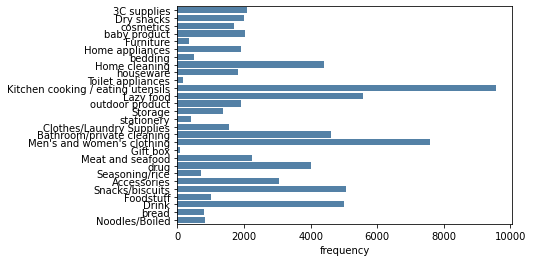

In [192]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(y =  trans, # 指定條形圖x軸的數據
      x = cate_count, # 指定需要繪圖的數據集
      hue_order = 0,
      color = 'steelblue', # 指定條形圖的填充色
      orient = 'horizontal' # 將條形圖水平顯示   
      )
# 重新設置x軸和y軸的標籤
plt.xlabel("frequency")
plt.ylabel('')

In [172]:
only_need_data.groupby("cate").size()

cate
3C用品         2096
乾貨零食         2009
化妝用品         1693
嬰兒用品         2039
家具            336
家電           1905
寢具            488
居家清潔         4411
居家用品         1810
廁所家電          175
廚房煮菜/吃飯用具    9572
懶人食物         5569
戶外用品         1920
收納           1375
文具            418
曬衣/洗衣用品      1563
浴室/私人清潔      4601
男女衣著         7600
禮盒             68
肉品海鮮         2231
藥品           4008
調味料/米         696
配件           3043
零食/餅乾        5073
食材           1003
飲料           5012
麵包            808
麵類/煮          822
dtype: int64

In [110]:
train, test = split_data(only_need_data, 0.8)

In [111]:
train

,product name,cate,spt_data
0,統欣生技納豆紅麴禮粒一,藥品,統欣生/技納豆紅/麴/禮粒/一
1,老楊鹹蛋黃餅,零食/餅乾,老/楊/鹹/蛋黃餅
2,瑪莉屋口比薩比薩片厚皮口味各一片,懶人食物,瑪莉/屋口/比薩/比薩片/厚皮/口味/各/一片
3,日本寶馬不鏽剛特厚調理鍋公分,廚房煮菜/吃飯用具,日本/寶馬/不/鏽/剛/特/厚/調/理/鍋/公分
4,滋養,化妝用品,滋養
...,...,...,...
57870,高挑寸喇叭吊帶褲褐色大碼預購,男女衣著,高挑/寸/喇叭/吊帶/褲/褐色/大碼/預購
57871,桂冠義大利麵超值冷凍,懶人食物,桂冠/義/大利/麵/超值/冷凍
57872,笛絲薇夢潘懷宗推薦喜樂纖膠囊,藥品,笛絲薇/夢/潘懷宗/推薦/喜樂/纖膠/囊
57873,永信葉酸鐵口含錠錠,藥品,永信/葉酸鐵口/含錠/錠


In [112]:
not_necessary_word = pd.read_csv("/content/not_necessary_word_2.csv")

In [113]:
not_necessary = not_necessary_word["Row Labels"]

In [114]:
def delete_unnecessary_word(list_):
  trash_list = []
  for i in range(len(list_)):
    for j in range(len(not_necessary)):
      if list_[i] == not_necessary[j]:
        trash_list.append(list_[i])
        continue

  if len(trash_list) == len(list_):
    return list_
  else:
    s1 = set(trash_list)
    s2 = set(list_)
    #print(s1, s2)
    #print(s2.difference(s1))
    return list(s2.difference(s1))

In [115]:
feature = []
for i in range(int(len(train))):
  if i % 200 == 0:
    print(round(i/len(train),2))
  a_ = str((train.loc[i,"spt_data"])).split("/")
  a_ = [x for x in a_ if str(x) != 'nan']
  #a_ = delete_less_than_one(a_)
  try:
    if len(a_) >= 2:
      a_ = delete_unnecessary_word(a_)
  except:
    continue
  feature += ([(word_feats(a), train.loc[i,"cate"]) for a in a_])
print(feature)

0.0
0.0
0.01
0.01
0.01
0.02
0.02
0.02
0.03
0.03
0.03
0.04
0.04
0.04
0.05
0.05
0.06
0.06
0.06
0.07
0.07
0.07
0.08
0.08
0.08
0.09
0.09
0.09
0.1
0.1
0.1
0.11
0.11
0.11
0.12
0.12
0.12
0.13
0.13
0.13
0.14
0.14
0.15
0.15
0.15
0.16
0.16
0.16
0.17
0.17
0.17
0.18
0.18
0.18
0.19
0.19
0.19
0.2
0.2
0.2
0.21
0.21
0.21
0.22
0.22
0.22
0.23
0.23
0.23
0.24
0.24
0.25
0.25
0.25
0.26
0.26
0.26
0.27
0.27
0.27
0.28
0.28
0.28
0.29
0.29
0.29
0.3
0.3
0.3
0.31
0.31
0.31
0.32
0.32
0.32
0.33
0.33
0.34
0.34
0.34
0.35
0.35
0.35
0.36
0.36
0.36
0.37
0.37
0.37
0.38
0.38
0.38
0.39
0.39
0.39
0.4
0.4
0.4
0.41
0.41
0.41
0.42
0.42
0.43
0.43
0.43
0.44
0.44
0.44
0.45
0.45
0.45
0.46
0.46
0.46
0.47
0.47
0.47
0.48
0.48
0.48
0.49
0.49
0.49
0.5
0.5
0.5
0.51
0.51
0.51
0.52
0.52
0.53
0.53
0.53
0.54
0.54
0.54
0.55
0.55
0.55
0.56
0.56
0.56
0.57
0.57
0.57
0.58
0.58
0.58
0.59
0.59
0.59
0.6
0.6
0.6
0.61
0.61
0.62
0.62
0.62
0.63
0.63
0.63
0.64
0.64
0.64
0.65
0.65
0.65
0.66
0.66
0.66
0.67
0.67
0.67
0.68
0.68
0.68
0.69
0.69
0.69
0.7
0.7
0.

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [116]:
from nltk.classify import NaiveBayesClassifier
from nltk.corpus import names
classifier = NaiveBayesClassifier.train(feature)
print(nltk.classify.accuracy(classifier,feature))

0.7626939856163355


In [ ]:
classifier.show_most_informative_features(100)

Most Informative Features
                      膠帶 = True               文具 : 男女衣著   =   3046.8 : 1.0
                       統 = True               禮盒 : 廚房煮菜/吃 =   2145.4 : 1.0
                       吹 = True             廁所家電 : 廚房煮菜/吃 =   2034.3 : 1.0
                       拌 = True             麵類/煮 : 男女衣著   =   1889.5 : 1.0
                      洗衣 = True           曬衣/洗衣用 : 男女衣著   =    952.5 : 1.0
                      原廠 = True             3C用品 : 廚房煮菜/吃 =    891.8 : 1.0
                      真心 = True               收納 : 配件     =    872.3 : 1.0
                      風機 = True             廁所家電 : 居家清潔   =    854.6 : 1.0
                       鋼 = True           廚房煮菜/吃 : 男女衣著   =    741.5 : 1.0
                      良品 = True               收納 : 浴室/私人清 =    722.0 : 1.0
                       一 = True             麵類/煮 : 男女衣著   =    664.3 : 1.0
                      一生 = True               禮盒 : 化妝用品   =    659.7 : 1.0
                      乳酪 = True               麵包 : 廚房煮菜/吃 =    630.8 : 1.0

In [117]:
rem = []
def get_largest_number(list_,num):
  x = Counter(list_).most_common()
  #print((x))
  try:
    if x[num][1] == x[num+1][1]:
      rem.append("have_the_same")
      #print(num)
      return get_largest_number(list_, num+1)
    else:
      #rem = []
      return x[num][0]
  except:
    try:
      return x[num][0]
    except:
      return "無法分類"

In [118]:
save_wrong_pair = []
def wrong_pair(ans, pred):
  save_wrong_pair.append((ans, pred))

In [121]:

from collections import Counter

count = 0
count_rem_w = 0
count_rem = 0
count_rem_1 = 0
count_rem_n = 0
partial_wrong_pair = 0
partial_wrong = []
for i in range(len(test)):
  if i % 50 == 0:
    print(round(i / len(test),2))
  word = str(test.loc[i,"spt_data"])
  #print(word)
  words = word.split("/")
  words = delete_unnecessary_word(words)
  words = [x for x in words if str(x) != 'nan']
  guess = []
  for j in range(len(words)):
    #print(words[j])
    if words[j] == "麵包":
      guess = ["麵包"]
      break
    elif words[j] == "禮盒":
      guess = ["禮盒"]
      break
    elif words[j] == "童":
      guess = ["嬰兒用品"]
      break
    guess.append(classifier.classify(word_feats(words[j])))
  #print(guess, "ans =" ,test.loc[i,"y"], test.loc[i,"x"])
  ans = get_largest_number(guess, 0)
  if len(rem):
    count_rem = count_rem + 1 

  if test.loc[i,"cate"]==ans:
    count = count + 1
  else:
    if len(rem):
      count_rem_w = count_rem_w + 1
      if len(rem) == 1:
        count_rem_1 = count_rem_1 + 1
      else:
        count_rem_n = count_rem_n + 1
    partial_wrong_pair = partial_wrong_pair + 1
    print("guess = ",ans," ","correct = ",test.loc[i,"cate"])
    wrong_pair(test.loc[i,"cate"] ,ans)  #前為答案，後為預測
    print(words)
  if i % 100 == 0:
    partial_wrong.append(partial_wrong_pair)
    print(partial_wrong_pair)
    partial_wrong_pair = 0
  rem = []
print("多元判斷的機率 = ", count_rem / len(test))
print("多數決情況成功機率",(count -  count_rem + count_rem_w) / (len(test) - count_rem))
print("在錯誤情況下多元判斷失敗機率 = ", count_rem_w / (len(test) - count))
print("多元判斷錯誤下一，為一元之機率 = ", count_rem_1 / count_rem_w)
print(count/len(test))

串流輸出內容已截斷至最後 5000 行。
['薑', '先生', '共']
guess =  男女衣著   correct =  配件
['撞色防', '金字', '皮革', '餃墨', '綠色', '刮', '兩', '用水']
guess =  配件   correct =  零食/餅乾
['巡禮豬', '耳朵']
guess =  浴室/私人清潔   correct =  居家清潔
['空間', '銀離子', '抑菌', '限量', '送', '超能橘']
guess =  男女衣著   correct =  家具
['格林', '桌上', '調式', '寬度']
0.18
guess =  嬰兒用品   correct =  戶外用品
['粉色', '秋冬', '野餐', '格紋']
guess =  居家清潔   correct =  家電
['伊萊', '克斯', '吸塵器', '氣旋']
guess =  男女衣著   correct =  戶外用品
['興農', '雷公', '殺蟲劑', '乳劑', '水基']
guess =  藥品   correct =  化妝用品
['素日', '紅嫩']
guess =  藥品   correct =  飲料
['純釀', '愛家', '諾麗酵液', '鑫']
guess =  麵包   correct =  零食/餅乾
['盛香珍', '法式', '酥', '千層']
guess =  乾貨零食   correct =  零食/餅乾
['麻辣', '成記', '牛肉乾']
guess =  男女衣著   correct =  廚房煮菜/吃飯用具
['研磨', '板岩']
guess =  懶人食物   correct =  乾貨零食
['鬆', '選', '鳳', '拉', '家', '便宜', '搶', '數', '凰', '下', '奇華餅', '揪團']
guess =  男女衣著   correct =  戶外用品
['竹紋加', '高度', '燒烤', '合金', '桌段', '寬鋁']
guess =  居家清潔   correct =  曬衣/洗衣用品
['甜心', '美則', '夏日', '芳香', '香香']
0.19
17
guess =  男女衣著   correct =  飲料
['

In [127]:
partial_wrong = partial_wrong[1:]

Kolmogorov–Smirnov Test

(array([ 3., 14., 15., 31., 30., 35.,  9.,  2.,  3.,  2.]),
 array([10. , 12.2, 14.4, 16.6, 18.8, 21. , 23.2, 25.4, 27.6, 29.8, 32. ]),
 <a list of 10 Patch objects>)

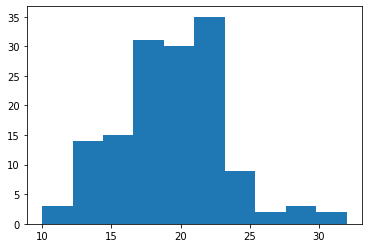

In [132]:
plt.hist(partial_wrong)

In [133]:
from scipy.stats import norm
loc, scale = norm.fit(partial_wrong)

In [136]:
n = norm(loc=loc, scale=scale)

In [141]:
np.min(partial_wrong)

10

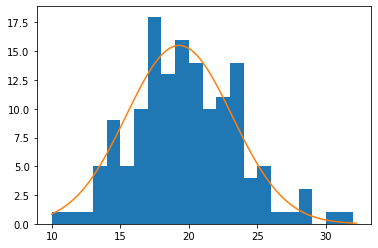

In [158]:
import matplotlib.pyplot as plt
plt.hist( partial_wrong, bins=np.arange(np.min(partial_wrong), np.max(partial_wrong)+0.2))
x = np.arange(np.min(partial_wrong), np.max(partial_wrong)+0.2, 0.2)
plt.plot(x, 150*n.pdf(x))

In [163]:
from scipy.stats import kstest
if kstest(partial_wrong, n.cdf).pvalue < 0.05:
  print("is not normal distribution")
else:
  print("is normal distribution")


is normal distribution


In [128]:
partial_wrong

[20,
 23,
 23,
 20,
 21,
 14,
 10,
 24,
 13,
 17,
 19,
 16,
 16,
 20,
 21,
 11,
 20,
 20,
 21,
 19,
 19,
 17,
 16,
 15,
 14,
 21,
 17,
 23,
 19,
 20,
 22,
 14,
 17,
 17,
 21,
 18,
 23,
 20,
 13,
 23,
 16,
 16,
 16,
 23,
 17,
 17,
 21,
 17,
 28,
 19,
 18,
 25,
 17,
 19,
 22,
 18,
 24,
 17,
 19,
 24,
 12,
 14,
 14,
 18,
 30,
 28,
 23,
 20,
 20,
 22,
 22,
 25,
 13,
 15,
 13,
 15,
 23,
 19,
 19,
 13,
 18,
 19,
 25,
 22,
 14,
 17,
 22,
 32,
 15,
 15,
 21,
 22,
 25,
 22,
 18,
 18,
 16,
 20,
 21,
 18,
 16,
 20,
 19,
 19,
 23,
 16,
 19,
 19,
 22,
 16,
 22,
 17,
 18,
 27,
 24,
 28,
 18,
 20,
 19,
 23,
 25,
 17,
 17,
 14,
 20,
 20,
 18,
 17,
 17,
 21,
 26,
 22,
 23,
 21,
 17,
 23,
 14,
 23,
 18,
 23,
 14,
 18,
 17,
 19]

In [122]:
Counter(save_wrong_pair).most_common(100)

[(('化妝用品', '藥品'), 273),
 (('嬰兒用品', '男女衣著'), 262),
 (('配件', '男女衣著'), 164),
 (('浴室/私人清潔', '男女衣著'), 130),
 (('廚房煮菜/吃飯用具', '男女衣著'), 118),
 (('化妝用品', '浴室/私人清潔'), 115),
 (('麵類/煮', '懶人食物'), 108),
 (('戶外用品', '男女衣著'), 108),
 (('飲料', '男女衣著'), 98),
 (('乾貨零食', '懶人食物'), 98),
 (('浴室/私人清潔', '居家清潔'), 98),
 (('飲料', '懶人食物'), 97),
 (('居家用品', '男女衣著'), 91),
 (('懶人食物', '男女衣著'), 88),
 (('居家清潔', '男女衣著'), 88),
 (('零食/餅乾', '男女衣著'), 85),
 (('廚房煮菜/吃飯用具', '懶人食物'), 84),
 (('乾貨零食', '零食/餅乾'), 82),
 (('居家清潔', '浴室/私人清潔'), 70),
 (('收納', '男女衣著'), 67),
 (('零食/餅乾', '懶人食物'), 59),
 (('肉品海鮮', '懶人食物'), 58),
 (('懶人食物', '肉品海鮮'), 54),
 (('3C用品', '男女衣著'), 52),
 (('懶人食物', '零食/餅乾'), 49),
 (('居家清潔', '廚房煮菜/吃飯用具'), 48),
 (('家電', '居家清潔'), 47),
 (('零食/餅乾', '乾貨零食'), 45),
 (('男女衣著', '配件'), 44),
 (('家電', '男女衣著'), 43),
 (('戶外用品', '廚房煮菜/吃飯用具'), 43),
 (('麵包', '懶人食物'), 42),
 (('調味料/米', '男女衣著'), 42),
 (('曬衣/洗衣用品', '居家清潔'), 40),
 (('曬衣/洗衣用品', '男女衣著'), 40),
 (('家電', '廚房煮菜/吃飯用具'), 37),
 (('食材', '男女衣著'), 35),
 (('懶人食物', '麵包'), 35),
 (('食材', '懶人食物'),

In [ ]:
import nltk
import math
import string
from nltk.corpus import stopwords
from collections import Counter
from nltk.stem.porter import *
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
index_list = list(set(train["cate"]))

In [ ]:
word_vectors = []
for i in range(len(index_list)):
  text = ""
  for j in range(len(train)):
    #print(extra_data.loc[j,"y"])
    if train.loc[j,"cate"] == index_list[i] and train.loc[j,"spt_data"] != "nan":
      print(train.loc[j,"spt_data"])
      text = train.loc[j,"spt_data"] +"/" + text
  
  word_vectors.append(text)
#index_list

串流輸出內容已截斷至最後 5000 行。
限時/搶/購點點/心豬/仔/流沙/一
菊/之/鱻/澎湖/飛魚/卵醬
南門/市場/逸/湘/齋/滷/大/腸/頭
滿面/香翠綠/茶香/抹/茶/紅豆
揪團/搶/便宜/法布/甜團購/芒果/珠寶下/拉/選數量/含運
好神/酥/嫩/手工/排骨/片
最/划算/花生/牛奶/冰棒/冷凍
海之金/南洋/咖哩/香烤/雞/腿
好神/絕/讚/去/骨/雞/腿/排/片
久久/津/北海道/爆漿/乳酪/塔團購/原味/下拉選/數量/含運
私房/蔡先生/幸福/菇/固
瑞春螺冠/清油/純素/十一
北灣/冰烤/地瓜/王/栗子/地瓜
優鮮配/優鮮/原味/雞免/運
農心/香辣/海鮮味/烏龍/麵
搖搖菇/墨西哥/辣起/司杏/鮑菇/酥/一共/兩
頂味/執餃/純/手工/鮮高麗菜/黑豚/水餃
紅藜/阿祖紅藜/輕/鬆/白米/糙米/一共/六
印尼/蔥燒/雞味湯/麵/五
巧活/特/製/椒/麻/雞/腿/排/支
優鮮配/知名/藝推薦/屏東/正源/萬巒/豬腳/隻/約/免運
安得烈/黑米/豪物資/募集/黑米/麩一購/買者/本不會/收到/商品
東門/市場/韭菜/豬肉水/餃個
金廚/咖哩/叻/沙風味/麵
花花/煮/婦東方/美雞湯
揪團/搶/便宜/冷凍白/花椰菜/米狀
黑貓/美食/鄉味/泡菜/水餃
百年/吳家/雞/捲/各條
樂活/棧/低卡/蒟/蒻/麵/義/大利/麵/醬/任選共
吉晟/嚴選/阿中/丸子/鮮蝦/天婦/羅
媽媽魚/手工/香腸/原味/一共/兩
大茂/玻璃/土豆/麵/筋
花蓮家/咖哩/南洋/咖哩/料理/黃/金豬/肉
源順/香椿/素/香/鬆/一共/兩
任快/樂大/廚紅燒/牛腩
即期/品樂/活棧/章俊源/純古法/釀造/蕃薯粉
宅配/大成/嫩/煎/雞/腿/排
泰凱/食堂/椰汁/炒豬/肉
超商取/貨來/一客/杯/麵/韓式/泡菜/風味
麻辣味/鹹/蛋/黃/乾/拌/麵
優鮮/配海/陸樂活/健身/餐/鮭/魚鹽/烤秋刀/魚醬/燒雞/腿/地瓜/嫩/肩牛/免運
公仔/麵/至尊/芝士/龍蝦/風味/五
綠色/未來/竹/鹽/十/穀/蘇打/聖德/科斯
金蘭脆/瓜
鄉味/水餃/招牌/蔥肉/泡菜/水餃
農心超/進化/辛碗/麵/濃郁/牛骨/湯味
愛/麵/族/什錦海鮮/鍋燒
金品/奶油/白醬/培根/義/大利/麵/冷凍
綠色/未來/有機/綜合/堅果/聖德/科斯
花花/煮婦/客家/經典/腐乳/肉電鍋
彙/饌/私房/菜/脆皮/椒/鹽/

In [ ]:
vectorizer = TfidfVectorizer(min_df=1)
vectorizer.fit_transform(word_vectors)
#print(vectorizer.get_feature_names())
Tf_idf = vectorizer.fit_transform(word_vectors).toarray()

In [ ]:
Tf_idf

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
rem_new = []
multi_vote = 0
total_multi = []
def calculate_word_TF_idf(words):
  A = [0]*(Tf_idf.shape[0])
  #print(A)
  for i in range(len(words)):
    col = vectorizer.vocabulary_.get(words[i])
    if col == None:
      continue
    for j in range(Tf_idf.shape[0]):
      A[j] = A[j] + Tf_idf[j][col]
  #print(A)
  return A



def new_score_alg(words, list_, num):  #word: is the original word sent into the model
  x = Counter(list_).most_common()  #list is the solution get by the model
  #print(x)
  try:
     if x[0][1] == x[1][1]:
      rem_new.append("have_the_same")
      get = calculate_word_TF_idf(words)
      return index_list[get.index(max(get))]
     else:
      #multi_vote = multi_vote + 1
      print("multivote")
      total_multi.append("a")
      return x[0][0]
  except:
    print("except")
    #print(calculate_word_TF_idf(words).shape())
    try:
      return x[0][0]
    except:
      return "無法分類"

In [ ]:

from collections import Counter

count = 0
count_rem_w = 0
count_rem = 0
count_rem_1 = 0
count_rem_n = 0
for i in range(len(test)):
  if i % 100 ==0:
    print(i/len(test))
  word = str(test.loc[i,"spt_data"])
  #print(word)
  words = word.split("/")
  words = delete_unnecessary_word(words)
  words = [x for x in words if str(x) != 'nan']
  guess = []
  for j in range(len(words)):
    #print(words[j])
    if words[j] == "麵包":
      guess = ["麵包"]
      break
    elif words[j] == "禮盒":
      guess = ["禮盒"]
      break
    elif words[j] == "童" or words[j] == "女童":
      guess = ["嬰兒用品"]
      break
    guess.append(classifier.classify(word_feats(words[j])))
  #print(guess, "ans =" ,test.loc[i,"y"], test.loc[i,"x"])
  ans = new_score_alg(words, guess, 0)
  if len(rem_new):
    count_rem = count_rem + 1 

  if test.loc[i,"cate"]==ans:
    count = count + 1
  else:
    if len(rem_new):
      count_rem_w = count_rem_w + 1
      if len(rem_new) == 1:
        count_rem_1 = count_rem_1 + 1
      else:
        count_rem_n = count_rem_n + 1
    print("guess = ",ans," ","correct = ",test.loc[i,"cate"])
    wrong_pair(test.loc[i,"cate"] ,ans)
    print(words)
  rem_new = []
print("多元判斷的機率 = ", count_rem / len(test))
print("多數決情況成功機率",(count -  count_rem + count_rem_w) / (len(test) - count_rem))
print("在錯誤情況下多元判斷失敗機率 = ", count_rem_w / (len(test) - count))
print("多元判斷錯誤下一，為一元之機率 = ", count_rem_1 / count_rem_w)
print(count/len(test))

串流輸出內容已截斷至最後 5000 行。
except
0.7187780772686433
multivote
except
except
except
except
guess =  麵包   correct =  乾貨零食
['藥行', '魚糖', '蔘', '鮪', '含運', '湖廣']
multivote
except
multivote
except
multivote
multivote
except
except
multivote
guess =  浴室/私人清潔   correct =  廚房煮菜/吃飯用具
['花茶', '電茶壺']
multivote
except
multivote
except
except
except
multivote
except
multivote
except
multivote
except
multivote
multivote
multivote
multivote
multivote
multivote
except
multivote
multivote
except
multivote
guess =  男女衣著   correct =  居家清潔
['型護踝', '排汗', '調式']
multivote
multivote
except
guess =  藥品   correct =  居家清潔
['加強', '擦拭布', '隨機', '顏色', '魔布', '頑垢', '出貨']
except
guess =  禮盒   correct =  零食/餅乾
['費列羅臻品']
multivote
guess =  零食/餅乾   correct =  食材
['歐真', '橄欖油']
multivote
multivote
multivote
multivote
except
guess =  男女衣著   correct =  飲料
['八寶粥禮']
multivote
multivote
except
except
guess =  廁所家電   correct =  廚房煮菜/吃飯用具
['國際牌', '五段', '調節']
guess =  男女衣著   correct =  配件
['圖', '襪十配', '水手', '物', '案', '襪口', '動', '鬆', '預購', '

#TF-IDF revisit(2)

In [ ]:
train

,product name,cate,spt_data
0,百靈軟糖水果熊造型,零食/餅乾,百靈/軟糖/水果/熊/造型
1,保濕化妝水,化妝用品,保濕化妝水
2,霹靂狼煙之万堺塵濤第章,收納,霹靂/狼/煙/之/万/堺/塵濤/第章
3,紗彌佳純銀時尚百搭不對稱橄欖枝葉造型垂墜耳環耳線款,配件,紗彌佳/純銀時/尚百搭/不/對/稱/橄欖枝葉/造型/垂墜/耳/環耳線款
4,聲寶四層紫外線烘碗機,廚房煮菜/吃飯用具,聲寶四層/紫外/線烘碗機
...,...,...,...
57870,多麼潔型超潔淨膠棉拖把,居家清潔,多麼/潔型/超潔淨/膠棉/拖把
57871,日本閃電銀閃電輕騎士把手拉鍊式硬殼行李,戶外用品,日本/閃電銀/閃電輕/騎士/把手/拉/鍊/式/硬殼/行李
57872,美之園手工高麗菜水餃冷凍,懶人食物,美之園/手工/高麗菜/水餃/冷凍
57873,法國玫翠思羊奶皂,浴室/私人清潔,法國/玫翠思/羊奶/皂


In [ ]:
category = list(set(train["cate"]))

In [ ]:
word_vector = []
for i in range(len(category)):
  string = ""
  for j in range(len(train)):
    if train.loc[j,"cate"] == category[i]:
      string = string + "/" + str(train.loc[j,"spt_data"])
  word_vector.append(string)
  print(round(i/len(final_categroy),2))

0.0
0.03
0.07
0.1
0.13
0.17
0.2
0.23
0.27
0.3
0.33
0.37
0.4
0.43
0.47
0.5
0.53
0.57
0.6
0.63
0.67
0.7
0.73
0.77
0.8
0.83
0.87
0.9


In [ ]:
vectorizer = TfidfVectorizer(min_df=1)
vectorizer.fit_transform(word_vector)
#print(vectorizer.get_feature_names())
Tf_idf = vectorizer.fit_transform(word_vector).toarray()

In [ ]:
Tf_idf

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
word = vectorizer.get_feature_names() #詞袋

In [ ]:
(np.mean(Tf_idf, axis = 0))
len(np.std(Tf_idf, axis = 0))

30477

In [ ]:

std_cate = np.std(Tf_idf, axis = 1)
mean_cate = np.mean(Tf_idf, axis = 1)
std_word = np.std(Tf_idf, axis = 0)
mean_word = np.mean(Tf_idf, axis = 0)
category_content = [0] * (len(category))
for j in range(len(category)):
  #category[j] = list(category[j])
  temp = []
  for i in range(len(Tf_idf[0])):
    #print()
    if Tf_idf[j][i] > (mean_cate[j] + 10 * std_cate[j]) and Tf_idf[j][i] > (mean_word[i] + 5 * std_word[i]):
      #print(final_categroy[j])
      temp.append(word[i])
      category_content[j] = temp
      #print(i, word[i], Tf_idf[j][i])

In [ ]:
category_content

[['兩色童', '女童', '孕婦', '恤色童', '男童', '色童', '褲色童', '起絨', '針織衫', '阿卡'],
 ['內衣', '大碼', '罩衫', '色大碼', '色女', '裙色', '褲色', '高挑'],
 ['久久',
  '乳酪',
  '依蕾',
  '品屋',
  '宜蘭諾',
  '快樂',
  '旅程',
  '活棧',
  '派夢地',
  '特獨享',
  '生日',
  '艾葛蛋',
  '蛋奶素',
  '蛋糕',
  '預購樂',
  '食感'],
 ['卡迪',
  '口香糖',
  '可樂果',
  '味覺',
  '夾心',
  '夾心餅',
  '威化',
  '打餅',
  '樂事',
  '洋芋片',
  '湖池',
  '華元',
  '蘇打餅',
  '餅乾'],
 ['奧莉薇', '帶雨刷', '旅行', '晴雨傘', '登機', '皮爾', '硬殼', '行李', '軟骨雨刷', '鋁框', '防爆', '黑膠'],
 ['他命',
  '健安喜',
  '加強',
  '命錠',
  '單位',
  '囊粒',
  '多立康',
  '強錠',
  '德奧',
  '恩賜',
  '恩賜高',
  '技特級',
  '日落',
  '滋美得',
  '發泡',
  '立善',
  '精胺',
  '綜合維',
  '維生素',
  '群加',
  '花葉黃素',
  '葉黃素',
  '葡萄糖',
  '軟膠',
  '遠東生',
  '魚油'],
 ['一匙', '南僑', '密網', '橘之屋', '洗衣', '洗衣粉', '濃縮', '白蘭', '超濃縮'],
 ['一食',
  '乾拌',
  '五木',
  '五辛素',
  '兄銷魂',
  '全素',
  '共約片',
  '刀削',
  '分拉',
  '大師',
  '天地',
  '山喜屋',
  '懋勝堂',
  '揚豐',
  '油蔥',
  '漁品',
  '燒乾拌',
  '石臼',
  '碾磨',
  '米粉',
  '純米',
  '老媽',
  '老鍋',
  '舒淇',
  '茉莉',
  '蕎麥',
  '軒海鮮',
  '選勁',
  '金博家',
  '金拌',
  '銷魂',
  '開運',
  '

#New Model

In [ ]:
def check_if_exists(x, ls):
    if x in ls:
      return True
    else:
      return 0

In [ ]:
def TF_IDF_cate(word):
  for i in range(len(category)):
    if check_if_exists(word, category_content[i]) == True:
      return category[i]

In [ ]:
print(TF_IDF_cate("a"))

None


In [ ]:

from collections import Counter

count = 0
count_rem_w = 0
count_rem = 0
count_rem_1 = 0
count_rem_n = 0
count_tfidf = 0
correct_tfidf = 0
for i in range(int(len(test))):
  if i % 100 ==0:
    print(i/len(test))
  word = str(test.loc[i,"spt_data"])
  #print(word)
  words = word.split("/")
  words = delete_unnecessary_word(words)
  words = [x for x in words if str(x) != 'nan']
  guess = []
  tf_idf = 0
  for j in range(len(words)):
    #print(words[j])
    if words[j] == "麵包":
      guess = ["麵包"]
      break
    elif words[j] == "禮盒":
      guess = ["禮盒"]
      break
    elif TF_IDF_cate(words[j]) != None:
      guess = [TF_IDF_cate(words[j])]
      tf_idf = 1
      print("TF decide",words, guess)
      break
    #print("guess")
    guess.append(classifier.classify(word_feats(words[j])))
  #print(guess, "ans =" ,test.loc[i,"y"], test.loc[i,"x"])
  ans = new_score_alg(words, guess, 0)
  count_tfidf = count_tfidf + tf_idf
  if len(rem_new):
    count_rem = count_rem + 1 

  if test.loc[i,"cate"] == ans:
    correct_tfidf = correct_tfidf + tf_idf
    count = count + 1
  else:
    if len(rem_new):
      count_rem_w = count_rem_w + 1
      if len(rem_new) == 1:
        count_rem_1 = count_rem_1 + 1
      else:
        count_rem_n = count_rem_n + 1
    print("guess = ",ans," ","correct = ",test.loc[i,"cate"])
    wrong_pair(test.loc[i,"cate"] ,ans)
    print(words)
  rem_new = []
print("多元判斷的機率 = ", count_rem / len(test))
print("多數決情況成功機率",(count -  count_rem + count_rem_w) / (len(test) - count_rem))
print("在錯誤情況下多元判斷失敗機率 = ", count_rem_w / (len(test) - count))
print("多元判斷錯誤下一，為一元之機率 = ", count_rem_1 / count_rem_w)
print("tfidf 正確率 = ", correct_tfidf / count_tfidf)
print(count/len(test))

串流輸出內容已截斷至最後 5000 行。
TF decide ['燈泡', '白光'] ['居家用品']
except
multivote
except
guess =  懶人食物   correct =  食材
['拌', '大漢涼', '豆腐']
TF decide ['系圓點', '圓點', '上衣', '預購', '大碼', '棉紗', '橘色'] ['男女衣著']
except
TF decide ['沐浴乳', '湛藍', '微風', '耀'] ['浴室/私人清潔']
except
multivote
guess =  男女衣著   correct =  廚房煮菜/吃飯用具
['薄型', '功能', '紋', '秤', '藍條', '電子式計', '計時', '費娜']
TF decide ['免運', '南瓜子', '飲罐', '糧口', '沖', '飲品', '研磨'] ['乾貨零食']
except
guess =  乾貨零食   correct =  飲料
['免運', '南瓜子', '飲罐', '糧口', '沖', '飲品', '研磨']
multivote
guess =  懶人食物   correct =  調味料/米
['可果', '蕃茄', '美']
TF decide ['疊', '摺', '洗衣', '帆布', '置物'] ['曬衣/洗衣用品']
except
TF decide ['方形', '保鮮長', '耐熱', '微波'] ['廚房煮菜/吃飯用具']
except
TF decide ['豆紅', '麴', '專利納', '德奧', '景天'] ['藥品']
except
0.6289308176100629
TF decide ['掛勾'] ['居家用品']
except
guess =  嬰兒用品   correct =  收納
['掛', '納', '吊', '亮', '彩', '筒', '造', '收']
except
except
TF decide ['洗衣', '槽', '一滴', '浸泡', '淨免', '省時'] ['曬衣/洗衣用品']
except
guess =  曬衣/洗衣用品   correct =  居家清潔
['洗衣', '槽', '一滴', '浸泡', '淨免', '省時']
TF decid

In [ ]:
partial_data = pd.read_csv("/content/家樂福2019.csv")

In [ ]:
len(partial_data)

35879

In [ ]:
test_product = pd.DataFrame()
test_product["product"] = partial_data["description"][1000:2000]

In [ ]:
test_product = test_product.reset_index(drop = True)

In [ ]:
def normalize_data(data_, column_name):
  for i in range(len(data_)):
    data_.loc[i,"normal_data"] = format_str_ch(data_.loc[i,column_name])
    data_.loc[i, "normal_data"] = remove_para(data_.loc[i, "normal_data"])
    data_.loc[i, "normal_data"] = remove(data_.loc[i, "normal_data"])
  return data_



In [ ]:
test_product = normalize_data(test_product,"product")

In [ ]:
test_product

,product,normal_data
0,黑松沙士245ml,黑松沙士
1,伯朗曼特寧240,伯朗曼特寧
2,山毛櫸斜煎鏟,山毛櫸斜煎鏟
3,舒酸定多元護理,舒酸定多元護理
4,都市潮風休閒背包,都市潮風休閒背包
...,...,...
995,家簡塵除清潔袋大,家簡塵除清潔袋大
996,明治果汁QQ軟糖,明治果汁軟糖
997,草莓-(小盒)專櫃,草莓小盒專櫃
998,財廣記素食乳酪,財廣記素食乳酪


In [ ]:
for i in range(len(test_product)):
  list_ = jieba.cut(str(test_product.loc[i,"normal_data"]), cut_all=False)
  test_product.loc[i ,"spt_data"] = ("/".join(list_))

In [ ]:
test_product

,product,normal_data,spt_data
0,黑松沙士245ml,黑松沙士,黑松沙士
1,伯朗曼特寧240,伯朗曼特寧,伯/朗曼/特寧
2,山毛櫸斜煎鏟,山毛櫸斜煎鏟,山毛櫸/斜/煎/鏟
3,舒酸定多元護理,舒酸定多元護理,舒酸定/多元/護理
4,都市潮風休閒背包,都市潮風休閒背包,都市/潮風/休閒/背包
...,...,...,...
995,家簡塵除清潔袋大,家簡塵除清潔袋大,家/簡塵/除/清潔袋/大
996,明治果汁QQ軟糖,明治果汁軟糖,明治/果汁/軟糖
997,草莓-(小盒)專櫃,草莓小盒專櫃,草莓/小盒/專櫃
998,財廣記素食乳酪,財廣記素食乳酪,財廣記/素食/乳酪


In [ ]:
words

['髮', '麗仕', '洗', '露', '修護']

In [ ]:
草莓/小盒/專櫃

In [ ]:
classifier.classify(word_feats(words[]))

'浴室/私人清潔'

In [ ]:

from collections import Counter
def get_cate(data_, column):
  tf_idf = 0
  for i in range(len(data_)):
    if i % 100 ==0:
      print(i/len(data_))
    word = str(data_.loc[i,column])
    #print(word)
    words = word.split("/")
    words = delete_unnecessary_word(words)
    words = [x for x in words if str(x) != 'nan']
    guess = []
    for j in range(len(words)):
      if words[j] == "麵包":
        guess = ["麵包"]
        break
      elif words[j] == "禮盒":
        guess = ["禮盒"]
        break
      elif TF_IDF_cate(words[j]) != None:
        guess = [TF_IDF_cate(words[j])]
        tf_idf = 1
        print("TF decide",words, guess)
        break
    #print("guess")
      guess.append(classifier.classify(word_feats(words[j])))
    print(guess)
    ans = new_score_alg(words, guess, 0)
    print(ans)
    data_.loc[i,"ans"] = ans
    if tf_idf ==1 :
      data_.loc[i,"tf_idf"] = 1
      tf_idf = 0
  return data_

In [ ]:
test_product = get_cate(test_product,"spt_data")

0.0
['飲料']
except
飲料
['飲料', '飲料', '飲料']
except
飲料
['廚房煮菜/吃飯用具', '男女衣著', '廚房煮菜/吃飯用具', '配件']
multivote
廚房煮菜/吃飯用具
['浴室/私人清潔', '浴室/私人清潔']
except
浴室/私人清潔
['戶外用品', '男女衣著', '男女衣著']
multivote
男女衣著
['廚房煮菜/吃飯用具', '調味料/米']
調味料/米
['零食/餅乾', '麵包']
零食/餅乾
['零食/餅乾', '食材']
食材
TF decide ['芭樂'] ['食材']
['食材']
except
食材
['廚房煮菜/吃飯用具', '懶人食物']
食材
['廚房煮菜/吃飯用具']
except
廚房煮菜/吃飯用具
['肉品海鮮', '肉品海鮮']
except
肉品海鮮
['男女衣著', '男女衣著']
except
男女衣著
['零食/餅乾', '零食/餅乾']
except
零食/餅乾
['男女衣著', '零食/餅乾']
化妝用品
['男女衣著', '男女衣著', '浴室/私人清潔']
multivote
男女衣著
TF decide ['包', '磨坊', '萬', '滷'] ['調味料/米']
['調味料/米']
except
調味料/米
['藥品', '食材', '乾貨零食']
調味料/米
['男女衣著']
except
男女衣著
['配件', '懶人食物', '配件']
multivote
配件
['食材', '廚房煮菜/吃飯用具', '懶人食物', '食材']
multivote
食材
['食材', '懶人食物', '食材']
multivote
食材
['懶人食物', '懶人食物']
except
懶人食物
['懶人食物', '懶人食物', '男女衣著']
multivote
懶人食物
['男女衣著', '嬰兒用品']
嬰兒用品
['懶人食物', '懶人食物', '懶人食物']
except
懶人食物
['居家清潔']
except
居家清潔
['零食/餅乾', '零食/餅乾']
except
零食/餅乾
['麵包']
except
麵包
['肉品海鮮', '零食/餅乾', '零食/餅乾']
multivote
零食/餅乾
TF decide ['蠔油', '萬

In [ ]:
test_product.to_csv("test_product.csv")
files.download("test_product.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
pd.DataFrame(category).to_csv("category.csv")

In [ ]:
files.download("category.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>